In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import *
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.compose import ColumnTransformer
!pip install catboost
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [6]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


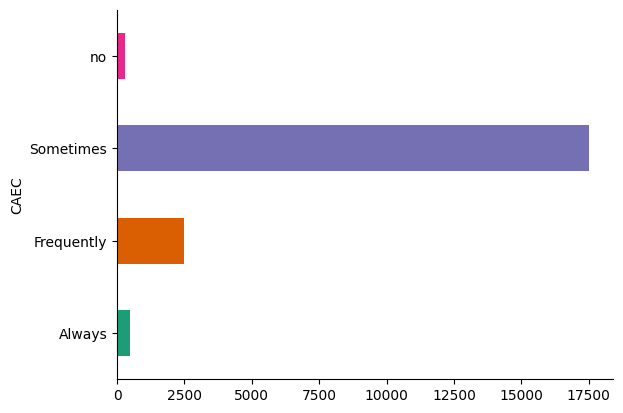

In [7]:
train.groupby('CAEC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

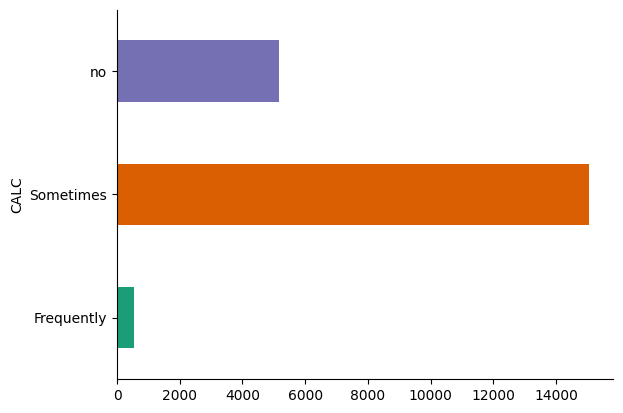

In [8]:
train.groupby('CALC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

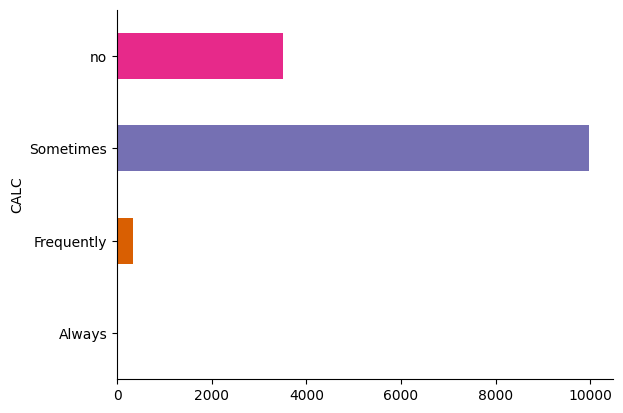

In [9]:
test.groupby('CALC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
test.groupby('CALC').size()

,0
CALC,
Always,2
Frequently,346
Sometimes,9979
no,3513


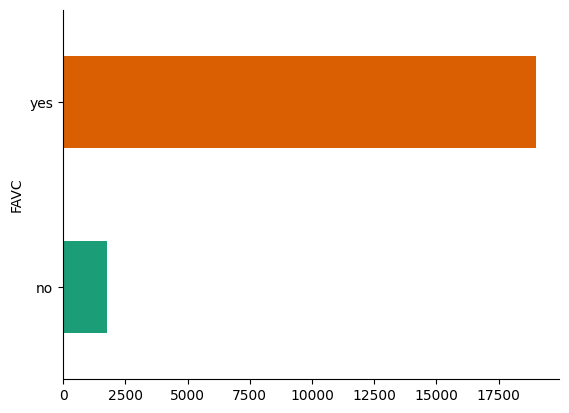

In [11]:
train.groupby('FAVC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

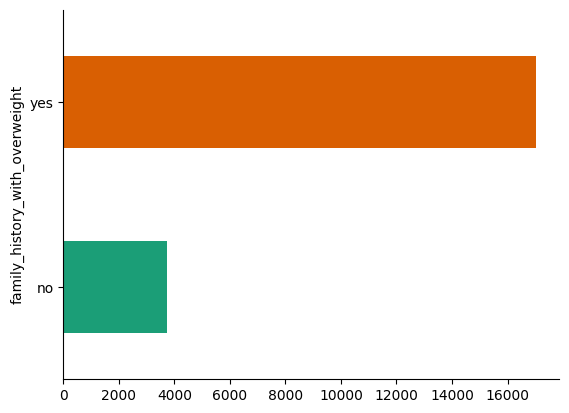

In [12]:
train.groupby('family_history_with_overweight').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

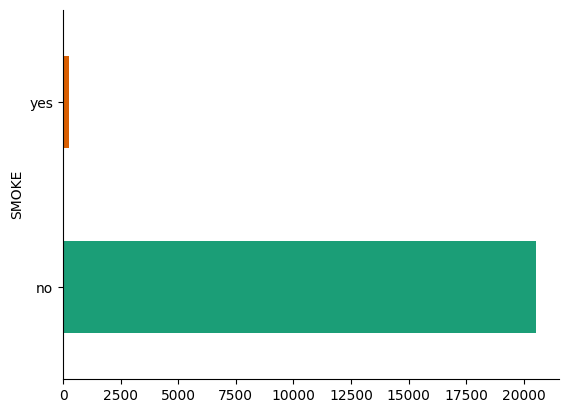

In [13]:
train.groupby('SMOKE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

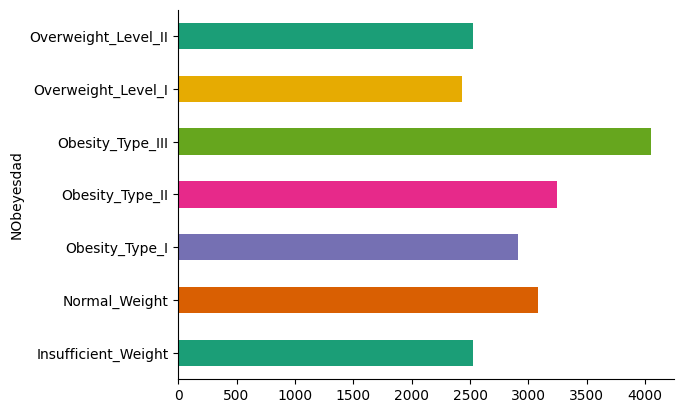

In [14]:
train.groupby('NObeyesdad').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

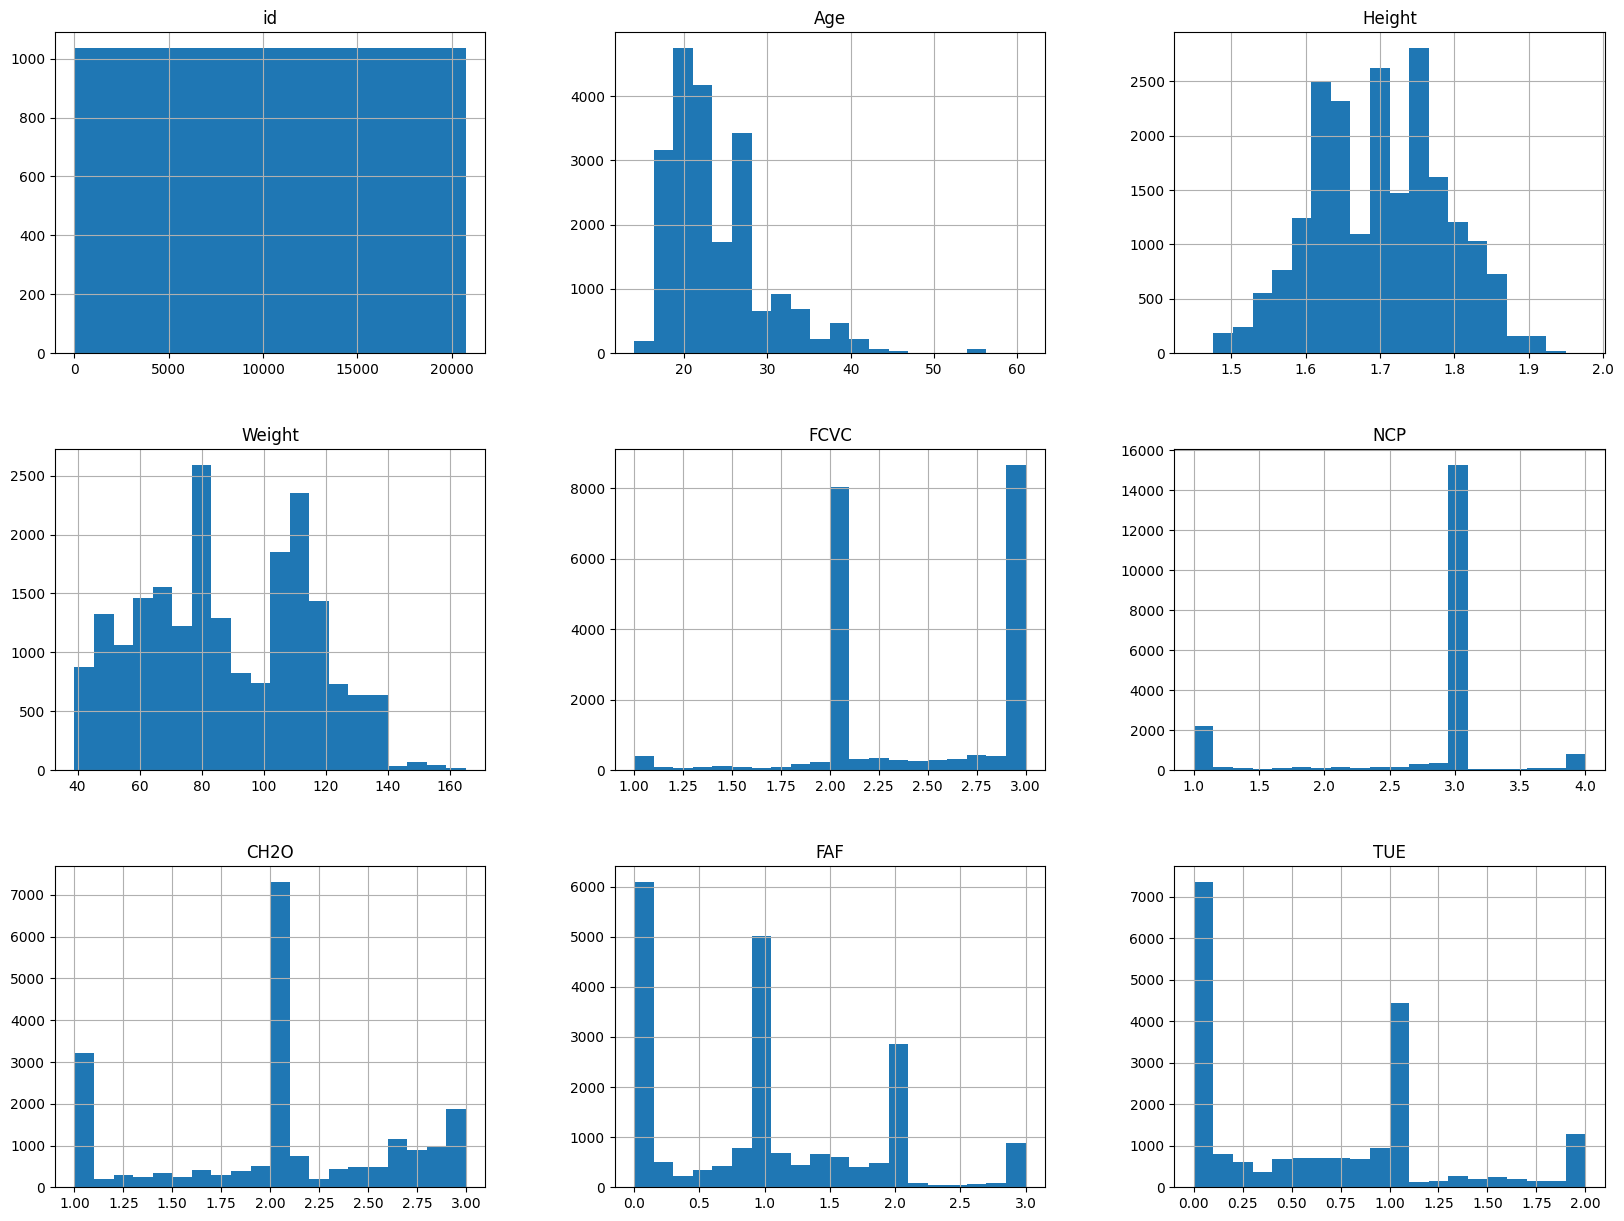

In [15]:
train.hist(bins = 20, figsize = (20, 15))

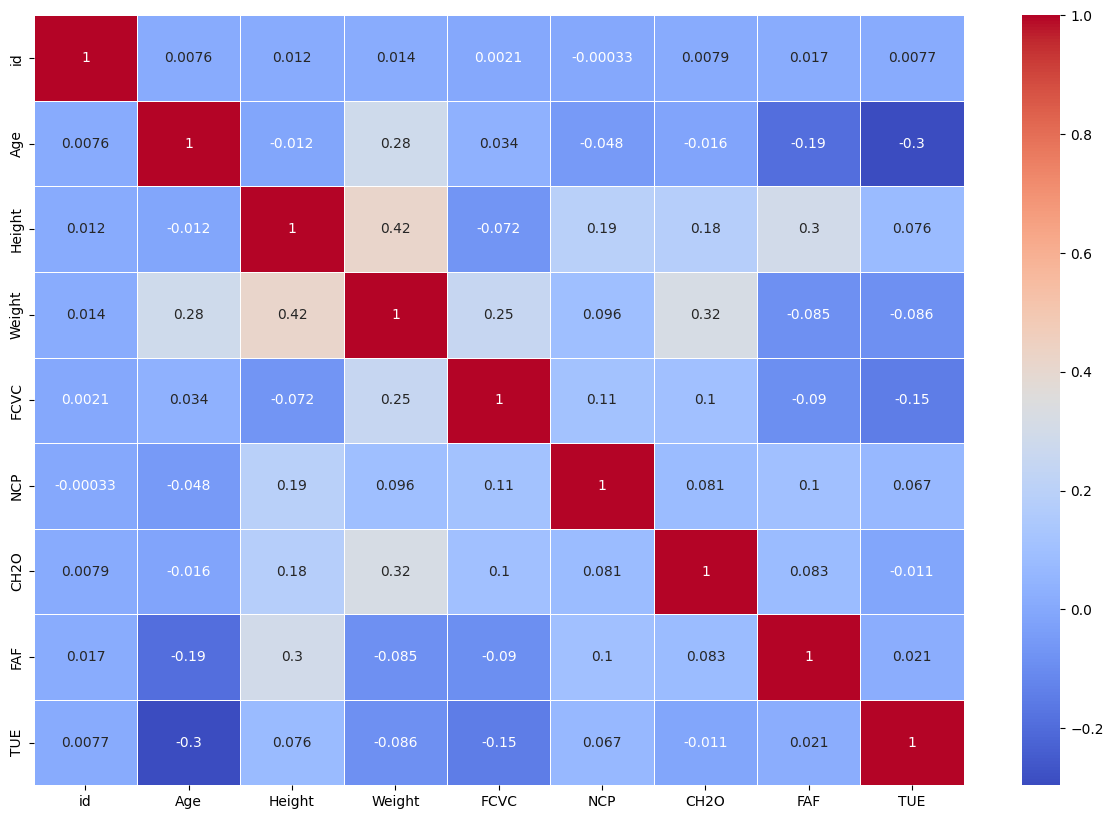

In [16]:
numerical_data = train.select_dtypes(include = ['number'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.show()

### Трансформация

In [17]:
def quantile_standard_scaling(df):
    df_scaled = df.copy()
    cols_to_scale = df.select_dtypes(include=['number']).columns
    transformer = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
    df_scaled[cols_to_scale] = transformer.fit_transform(df[cols_to_scale])
    return df_scaled

def encode_categorical_columns(df):
    df_encoded = df.copy()
    cols_to_encode = df.select_dtypes(include=['object']).columns
    if 'NObeyesdad' in cols_to_encode:
        cols_to_encode = cols_to_encode.drop('NObeyesdad')
    for col in cols_to_encode:
        if (df_encoded[col].nunique() == 1):
            continue
        ohe = OneHotEncoder()
        data = pd.DataFrame(df_encoded[col], columns=[col])
        encoded_data = ohe.fit_transform(pd.DataFrame(df_encoded[col], columns=[col])).toarray()
        encoded_columns = ohe.get_feature_names_out([col])
        encoded_df_fragm = pd.DataFrame(encoded_data, columns=encoded_columns)
        df_encoded = pd.concat([df_encoded.drop(columns=[col]), encoded_df_fragm], axis=1)

    return df_encoded

In [18]:
train_q = quantile_standard_scaling(train)
test_q = quantile_standard_scaling(test)

train_q

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-5.199338,Male,0.332198,-0.096785,-0.122198,yes,yes,-0.656486,-0.774833,Sometimes,no,1.027176,no,-5.199338,0.381964,Sometimes,Public_Transportation,Overweight_Level_II
1,-5.199338,Female,-1.307063,-1.593219,-1.031509,yes,yes,-0.656486,0.213636,Frequently,no,-0.121995,no,0.110627,0.691121,no,Automobile,Normal_Weight
2,-4.003131,Female,-1.307063,0.137143,-1.347972,yes,yes,-1.600394,-1.186280,Sometimes,no,-0.612012,no,-0.273089,1.431971,no,Public_Transportation,Insufficient_Weight
3,-3.836069,Female,-0.534848,0.132001,1.588588,yes,yes,5.199338,0.213636,Sometimes,no,-0.726523,no,0.599946,0.173067,Sometimes,Public_Transportation,Obesity_Type_III
4,-3.735249,Male,1.304121,2.747453,0.188033,yes,yes,0.114113,-1.073233,Sometimes,no,-0.563274,no,0.861655,0.344572,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,3.803000,Male,0.392492,0.720948,0.922623,yes,yes,0.239855,0.213636,Sometimes,no,0.414829,no,0.523537,-0.277954,Sometimes,Public_Transportation,Obesity_Type_II
20754,3.971315,Male,-1.307063,0.120731,-1.453280,no,yes,5.199338,5.199338,Frequently,no,-5.199338,no,1.176890,0.691121,Sometimes,Public_Transportation,Insufficient_Weight
20755,5.199338,Male,-0.588024,1.298271,0.513496,yes,yes,0.011741,0.213636,Sometimes,no,-0.121995,no,0.447305,1.130517,no,Public_Transportation,Obesity_Type_II
20756,5.199338,Male,1.516637,-0.020074,-0.017091,yes,yes,0.110419,-1.073233,Sometimes,no,0.405726,no,-5.199338,0.381309,no,Automobile,Overweight_Level_II


In [19]:
df_train_encoded = encode_categorical_columns(train_q)
df_test_encoded = encode_categorical_columns(test_q)

df_train_encoded

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-5.199338,0.332198,-0.096785,-0.122198,-0.656486,-0.774833,1.027176,-5.199338,0.381964,Overweight_Level_II,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-5.199338,-1.307063,-1.593219,-1.031509,-0.656486,0.213636,-0.121995,0.110627,0.691121,Normal_Weight,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-4.003131,-1.307063,0.137143,-1.347972,-1.600394,-1.186280,-0.612012,-0.273089,1.431971,Insufficient_Weight,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-3.836069,-0.534848,0.132001,1.588588,5.199338,0.213636,-0.726523,0.599946,0.173067,Obesity_Type_III,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-3.735249,1.304121,2.747453,0.188033,0.114113,-1.073233,-0.563274,0.861655,0.344572,Overweight_Level_II,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,3.803000,0.392492,0.720948,0.922623,0.239855,0.213636,0.414829,0.523537,-0.277954,Obesity_Type_II,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20754,3.971315,-1.307063,0.120731,-1.453280,5.199338,5.199338,-5.199338,1.176890,0.691121,Insufficient_Weight,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20755,5.199338,-0.588024,1.298271,0.513496,0.011741,0.213636,-0.121995,0.447305,1.130517,Obesity_Type_II,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20756,5.199338,1.516637,-0.020074,-0.017091,0.110419,-1.073233,0.405726,-5.199338,0.381309,Overweight_Level_II,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [20]:
train_target = df_train_encoded['NObeyesdad']
train = df_train_encoded.drop(columns=['id', 'NObeyesdad'])
test = df_test_encoded[train.columns]

### Генерация

In [21]:
for df in [train, test]:
    df['BMI'] = df['Weight'] / (df['Height'] ** 2)
    df['WaterConsuption'] = df['CH2O'].apply(lambda x: 1.0 if x >= 2.0 else 0.0)

### Сильные модели

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train, train_target, test_size=0.3, random_state=42)

ord_encoder_target = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

y_train_ord = ord_encoder_target.fit_transform(y_train.to_frame()).flatten()
y_test_ord = ord_encoder_target.transform(y_test.to_frame()).flatten()

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train_ord)

RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print('accuracy=', accuracy_score(y_pred, y_test_ord))

accuracy= 0.892742453436095


In [25]:
clf = XGBClassifier(random_state=42, verbose=False)
clf.fit(X_train, y_train_ord)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
y_pred = clf.predict(X_test)

print('accuracy=', accuracy_score(y_pred, y_test_ord))

accuracy= 0.8994861913937059


In [27]:
catboost_params = {'loss_function': 'MultiClass',
                   'eval_metric': 'Accuracy',
                   'learning_rate': 0.07,
                   'auto_class_weights': 'Balanced',
                   'verbose': False,
                   'random_state': 42
                   }

clf = CatBoostClassifier(**catboost_params)
clf.fit(X_train, y_train_ord)

In [28]:
y_pred = clf.predict(X_test)

print('accuracy=', accuracy_score(y_pred, y_test_ord))

accuracy= 0.9044637122671805


In [29]:
lgbm_params = {
               'objective': 'multiclass',
               'learning_rate': 0.032,
               'verbose': -1
               }

clf = LGBMClassifier(**lgbm_params)
clf.fit(X_train, y_train_ord)

LGBMClassifier(learning_rate=0.032, objective='multiclass', verbose=-1)

In [30]:
y_pred = clf.predict(X_test)

print('accuracy=', accuracy_score(y_pred, y_test_ord))

accuracy= 0.9028580603725113


# Усиление(нет)

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_columns = ['BMI', 'Height', 'Weight', 'CH2O', 'Age', 'TUE', 'NCP', 'FAF', 'FCVC']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_X_train = poly.fit_transform(X_train[poly_columns])
poly_X_test = poly.transform(X_test[poly_columns])
poly_test = poly.transform(test[poly_columns])
new_columns = poly.get_feature_names_out(poly_columns)
X_train_p = pd.concat([X_train.drop(columns=poly_columns).reset_index(), pd.DataFrame(poly_X_train, columns=new_columns)], axis=1).set_index('index')
X_test_p = pd.concat([X_test.drop(columns=poly_columns).reset_index(), pd.DataFrame(poly_X_test, columns=new_columns)], axis=1).set_index('index')
test_p = pd.concat([test.drop(columns=poly_columns).reset_index(), pd.DataFrame(poly_test, columns=new_columns)], axis=1).set_index('index')

In [32]:
lgbm_params = {
               'objective': 'multiclass',
               'learning_rate': 0.033,
               'verbose': -1
               }

clf = LGBMClassifier(**lgbm_params)
clf.fit(X_train_p, y_train_ord)

LGBMClassifier(learning_rate=0.033, objective='multiclass', verbose=-1)

In [33]:
y_pred = clf.predict(X_test_p)

print('accuracy=', accuracy_score(y_pred, y_test_ord))

accuracy= 0.901252408477842


In [34]:
catboost_params = {'loss_function': 'MultiClass',
                   'eval_metric': 'Accuracy',
                   'learning_rate': 0.07,
                   'auto_class_weights': 'Balanced',
                   'verbose': False,
                   'random_state': 42
                   }

clf = CatBoostClassifier(**catboost_params)
clf.fit(X_train_p, y_train_ord)

In [35]:
y_pred = clf.predict(X_test_p)

print('accuracy=', accuracy_score(y_pred, y_test_ord))

accuracy= 0.9007707129094412


полиномиальные фичи не оправдались, хотя мб стоило получше посмотреть в них

## Регуляризация

In [36]:
catboost_params = {'loss_function': 'MultiClass',
                   'eval_metric': 'Accuracy',
                   'learning_rate': 0.071,
                   'auto_class_weights': 'Balanced',
                   'verbose': False,
                   'random_state': 42,
                   'l2_leaf_reg': 10,
                   'bagging_temperature': 0.5
                   }

cat_clf = CatBoostClassifier(**catboost_params)
cat_clf.fit(X_train, y_train_ord)

y_pred = cat_clf.predict(X_test)

print('accuracy=', accuracy_score(y_pred, y_test_ord))

accuracy= 0.9041425818882466


здесь долгие подгоны циферок, у меня 0 ресурса их комментировать
на самом деле может я сведу оптимизационной функцией во что-то более осознанное

In [37]:

lgbm_params = {
               'objective': 'multiclass',
               'learning_rate': 0.033,
               'verbose': -1,
               'num_class': 7,
               'colsample_bytree': 0.3,
               'n_estimators': 500,
               'lambda_l1': 0.01,
               'lambda_l2': 0.027,
               'max_depth': 10,
               'subsample': 0.95,
               }

lgbm_clf = LGBMClassifier(**lgbm_params)
lgbm_clf.fit(X_train, y_train_ord)
y_pred_lgbm = lgbm_clf.predict(X_test)

print('accuracy=', accuracy_score(y_pred_lgbm, y_test_ord))

accuracy= 0.905427103403982


In [38]:
rf_pipeline = Pipeline([('clf', RandomForestClassifier())])

lgbm_pipeline = Pipeline([('clf', lgbm_clf)])

cat_pipeline = Pipeline([('clf', cat_clf)])

estimators = [('rf', rf_pipeline), ('catboost', cat_pipeline), ('lgbm', lgbm_pipeline)]

In [39]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


In [40]:
stacking_clf.fit(X_train, y_train_ord)

StackingClassifier(estimators=[('rf',
                                Pipeline(steps=[('clf',
                                                 RandomForestClassifier())])),
                               ('catboost',
                                Pipeline(steps=[('clf',
                                                 <catboost.core.CatBoostClassifier object at 0x7dacd9bbf0a0>)])),
                               ('lgbm',
                                Pipeline(steps=[('clf',
                                                 LGBMClassifier(colsample_bytree=0.3,
                                                                lambda_l1=0.01,
                                                                lambda_l2=0.027,
                                                                learning_rate=0.033,
                                                                max_depth=10,
                                                                n_estimators=500,
                                                                num_class=7,
                                                                objective='multiclass',
                                                                subsample=0.95,
                                                                verbose=-1))]))],
                   final_estimator=LogisticRegression())

In [41]:
y_pred = stacking_clf.predict(X_test)

print('accuracy=', accuracy_score(y_pred, y_test_ord))

accuracy= 0.9051059730250481


In [42]:
y_pred = stacking_clf.predict(test)
preds_out = ord_encoder_target.inverse_transform(y_pred.reshape(-1, 1))

In [43]:
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_stack.csv', index=False)

private score 0.90326

In [45]:
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

In [46]:
voting_clf.fit(X_train, y_train_ord)

VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('clf',
                                               RandomForestClassifier())])),
                             ('catboost',
                              Pipeline(steps=[('clf',
                                               <catboost.core.CatBoostClassifier object at 0x7dacd9bbf0a0>)])),
                             ('lgbm',
                              Pipeline(steps=[('clf',
                                               LGBMClassifier(colsample_bytree=0.3,
                                                              lambda_l1=0.01,
                                                              lambda_l2=0.027,
                                                              learning_rate=0.033,
                                                              max_depth=10,
                                                              n_estimators=500,
                                                              num_class=7,
                                                              objective='multiclass',
                                                              subsample=0.95,
                                                              verbose=-1))]))],
                 voting='soft')

In [49]:
y_pred = voting_clf.predict(test)
preds_out = ord_encoder_target.inverse_transform(y_pred.reshape(-1, 1))
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)
preds_df.to_csv('preds_vote.csv', index=False)

private score 0.90182